In [109]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [110]:
business = pd.read_csv('yelp_business.csv')
user = pd.read_csv('yelp_user.csv')

In [111]:
attr = pd.read_csv('yelp_business_attributes.csv')
hours = pd.read_csv('yelp_business_hours.csv')
checkin = pd.read_csv('yelp_checkin.csv')
tip = pd.read_csv('yelp_tip.csv')

In [112]:
business.columns

Index([u'business_id', u'name', u'neighborhood', u'address', u'city', u'state',
       u'postal_code', u'latitude', u'longitude', u'stars', u'review_count',
       u'is_open', u'categories'],
      dtype='object')

In [113]:
user.columns

Index([u'user_id', u'name', u'review_count', u'yelping_since', u'friends',
       u'useful', u'funny', u'cool', u'fans', u'elite', u'average_stars',
       u'compliment_hot', u'compliment_more', u'compliment_profile',
       u'compliment_cute', u'compliment_list', u'compliment_note',
       u'compliment_plain', u'compliment_cool', u'compliment_funny',
       u'compliment_writer', u'compliment_photos'],
      dtype='object')

In [114]:
attr.columns

Index([u'business_id', u'AcceptsInsurance', u'ByAppointmentOnly',
       u'BusinessAcceptsCreditCards', u'BusinessParking_garage',
       u'BusinessParking_street', u'BusinessParking_validated',
       u'BusinessParking_lot', u'BusinessParking_valet',
       u'HairSpecializesIn_coloring', u'HairSpecializesIn_africanamerican',
       u'HairSpecializesIn_curly', u'HairSpecializesIn_perms',
       u'HairSpecializesIn_kids', u'HairSpecializesIn_extensions',
       u'HairSpecializesIn_asian', u'HairSpecializesIn_straightperms',
       u'RestaurantsPriceRange2', u'GoodForKids', u'WheelchairAccessible',
       u'BikeParking', u'Alcohol', u'HasTV', u'NoiseLevel',
       u'RestaurantsAttire', u'Music_dj', u'Music_background_music',
       u'Music_no_music', u'Music_karaoke', u'Music_live', u'Music_video',
       u'Music_jukebox', u'Ambience_romantic', u'Ambience_intimate',
       u'Ambience_classy', u'Ambience_hipster', u'Ambience_divey',
       u'Ambience_touristy', u'Ambience_trendy', u'Ambie

In [115]:
attr.rename(columns = {'DietaryRestrictions_dairy-free':'DietaryRestrictions_dairyfree','DietaryRestrictions_gluten-free':'DietaryRestrictions_glutenfree','DietaryRestrictions_soy-free':'DietaryRestrictions_soyfree'}, inplace = True)

In [116]:
attr.columns

Index([u'business_id', u'AcceptsInsurance', u'ByAppointmentOnly',
       u'BusinessAcceptsCreditCards', u'BusinessParking_garage',
       u'BusinessParking_street', u'BusinessParking_validated',
       u'BusinessParking_lot', u'BusinessParking_valet',
       u'HairSpecializesIn_coloring', u'HairSpecializesIn_africanamerican',
       u'HairSpecializesIn_curly', u'HairSpecializesIn_perms',
       u'HairSpecializesIn_kids', u'HairSpecializesIn_extensions',
       u'HairSpecializesIn_asian', u'HairSpecializesIn_straightperms',
       u'RestaurantsPriceRange2', u'GoodForKids', u'WheelchairAccessible',
       u'BikeParking', u'Alcohol', u'HasTV', u'NoiseLevel',
       u'RestaurantsAttire', u'Music_dj', u'Music_background_music',
       u'Music_no_music', u'Music_karaoke', u'Music_live', u'Music_video',
       u'Music_jukebox', u'Ambience_romantic', u'Ambience_intimate',
       u'Ambience_classy', u'Ambience_hipster', u'Ambience_divey',
       u'Ambience_touristy', u'Ambience_trendy', u'Ambie

In [117]:
hours.columns

Index([u'business_id', u'monday', u'tuesday', u'wednesday', u'thursday',
       u'friday', u'saturday', u'sunday'],
      dtype='object')

In [118]:
checkin.columns

Index([u'business_id', u'weekday', u'hour', u'checkins'], dtype='object')

In [119]:
tip.columns

Index([u'text', u'date', u'likes', u'business_id', u'user_id'], dtype='object')

# EDA : BUSINESS

Check for missing values in any of the columns

In [120]:
business.isnull().values.any()

True

In [121]:
business.isnull().sum()    #It is seen that the neighborhood and pincode columns have missing values

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

In [122]:
#Since atleast 61% of neighborhood is null and so we decide to drop this column.
del business['neighborhood']

In [123]:
business['postal_code']=business['postal_code'].fillna(0) #The na values have been filled with zero

In [124]:
business_dropped=business.dropna(axis=0)

In [125]:
business_dropped.isnull().sum()
business_dropped.columns

Index([u'business_id', u'name', u'address', u'city', u'state', u'postal_code',
       u'latitude', u'longitude', u'stars', u'review_count', u'is_open',
       u'categories'],
      dtype='object')

Business data cleaned. Let's understand the distribution of the variables.

In [126]:
# Let's take only US data.

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
business_clean = business_dropped.loc[business_dropped['state'].isin(states)]

C:\Users\legle\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\legle\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\legle\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Text(0.5,1,'Top 10 business categories of Yelp US')

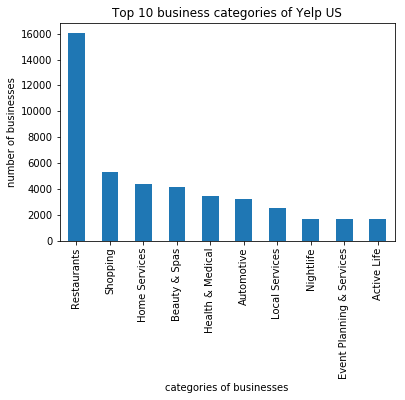

In [127]:
#Categories

business_clean[business_clean.categories.str.contains('Restaurants')]['categories']='Restaurants'
business_clean['categories']=business_clean.categories.str.split(';',expand=True)[0]
business_clean['categories']=business_clean.categories.replace(['Pizza','Food'],'Restaurants')
business_clean['categories'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('number of businesses')
plt.xlabel('categories of businesses')
plt.title('Top 10 business categories of Yelp US')

In [128]:
#Check if business_id is unique column

business_clean[business_clean.groupby('business_id')['business_id'].transform('size')>1]
#So there are no duplicate values in business id which makes it the unique identifier.

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories


In [129]:
business_clean['city'].value_counts()[:10]  #1,04,526/174564

Las Vegas     26774
Phoenix       17213
Charlotte      8553
Scottsdale     8228
Pittsburgh     6355
Mesa           5760
Henderson      4465
Tempe          4263
Chandler       3994
Cleveland      3322
Name: city, dtype: int64

Text(0.5,1,'Top 10 locations of Yelp businesses')

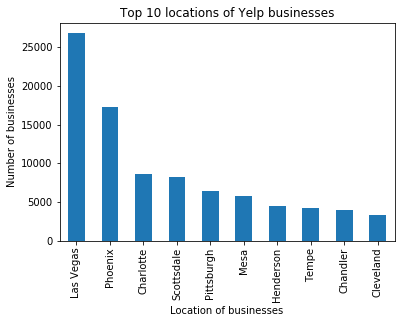

In [130]:
#plot the top 10 cities with highest businesses
top_business=business_clean['city'].value_counts()[:10].plot(kind='bar')
plt.ylabel('Number of businesses')
plt.xlabel('Location of businesses')
plt.title('Top 10 locations of Yelp businesses')

In [131]:
#Proportion of the top 10 cities with business
(1.0*business_clean['city'].value_counts()[:10].sum())/business_clean['city'].value_counts().sum()

0.6931068884350985

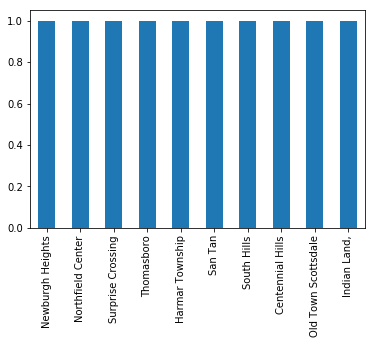

In [132]:
#plot the bottom 10 cities with low number of businesses
bottom_business=business_clean['city'].value_counts().sort_values(ascending=True)[:10].plot(kind='bar')

Text(0.5,1,'Top 10 review generating locations')

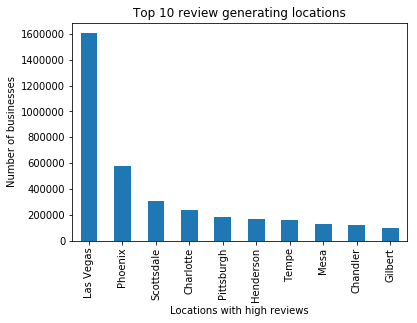

In [133]:
#Cities with the most review_count

top_reviews=business_clean.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]
top_reviews.plot(kind='bar')
plt.ylabel('Number of businesses')
plt.xlabel('Locations with high reviews')
plt.title('Top 10 review generating locations')
#We see common misspellings in the city, correct it.

In [134]:
def merge_cities(s):
    
    # Create a map of misspellings to correct spelling
    misspellings = {'Ahwahtukee':'Ahwatukee',
                    'Ahwatukee Foothills Village':'Ahwatukee',
                    '110 Las Vegas':'las vegas'}
    
    if s in misspellings:
        return misspellings[s]
    else:
        return s

# Test it
print 'Ahwahtukee mapped to', merge_cities('Ahwahtukee')

Ahwahtukee mapped to Ahwatukee


In [135]:
# Apply the function to the Series
business_clean['city'] = business_clean['city'].map(merge_cities)

# Check that it worked
mask = (business_clean['city'] == 'Ahwahtukee')
business_clean['city'][mask]
#Worked because it returns an empty series for this.

C:\Users\legle\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Series([], Name: city, dtype: object)

In [136]:
#Cities with the most review_count


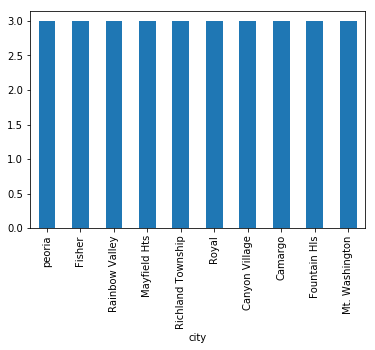

In [137]:
#Cities with the least review_count

bottom_reviews=business_clean.groupby('city')['review_count'].sum().sort_values(ascending=True)[:10]
bottom_reviews.plot(kind='bar')

In [138]:
#See if the top and bottom cities on number of restaurants also have most or least reviews
business_clean_crdf=pd.DataFrame({'review_count':business_clean.groupby('city')['review_count'].sum(),'average_stars':business_clean.groupby('city')['stars'].mean(),'total_count':business_clean.groupby('city')['city'].count()},index=business_clean['city'].drop_duplicates().sort_values())
business_clean_crdf['ratio']=(1.0*business_clean_crdf['review_count'])/business_clean_crdf['total_count']
business_clean_sorted=business_clean_crdf.sort_values(by='total_count',ascending=False)
business_clean_sorted[:2]

,average_stars,review_count,total_count,ratio
city,,,,
Las Vegas,3.709905,1604161,26774,59.91488
Phoenix,3.673793,576709,17213,33.50427


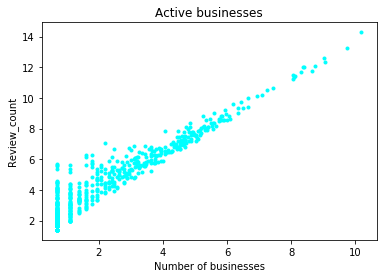

In [139]:
vegas_dropped=business_clean_sorted[-1088:]
vegas_dropped.sort_values(by='total_count')
plot(vegas_dropped['total_count'].apply(np.log1p),vegas_dropped['review_count'].apply(np.log1p),marker='.', color='cyan', linestyle='None')
figsize(10,5)
xlabel('Number of businesses')
ylabel('Review_count')
title('Active businesses')
show()

In [140]:
business_clean_sorted['review_count'].mean()

6744.73425499232

In [141]:
business_clean_sorted['average_stars'].mean()

3.663642902203409

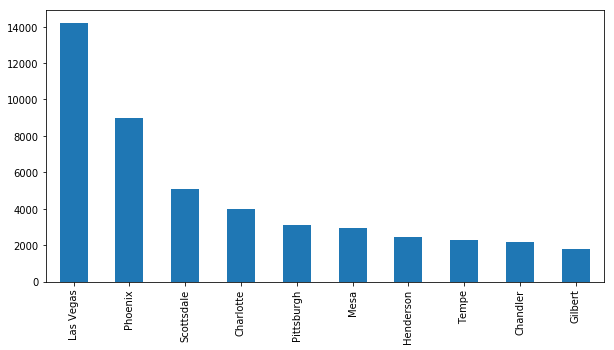

In [142]:
#cities with businesses with stars greater than 3.6

bus=business_clean[business_clean['stars']>3.5]
bus[['business_id','city','stars','review_count']]

cities_good_star=bus['city'].value_counts()
cities_good_star[:10].plot(kind='bar')

#Scottsdale,Montreal is diff

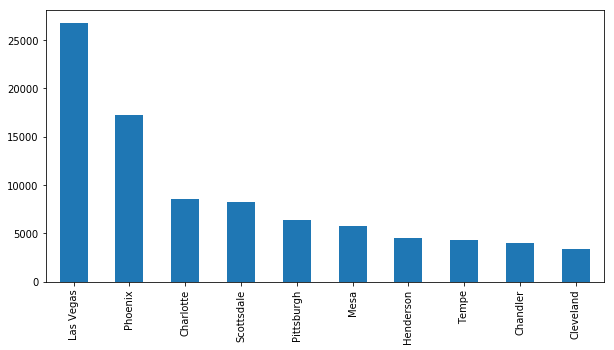

In [143]:
top_business=business_clean['city'].value_counts()[:10].plot(kind='bar')

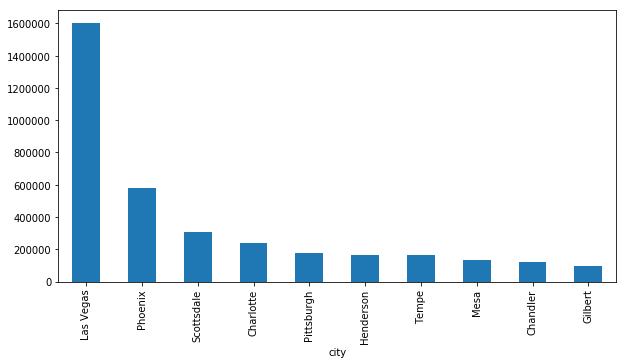

In [144]:
top_reviews=business_clean.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]
top_reviews.plot(kind='bar')

In [145]:
cities_good_star[:10]

Las Vegas     14215
Phoenix        9000
Scottsdale     5102
Charlotte      3983
Pittsburgh     3097
Mesa           2915
Henderson      2465
Tempe          2277
Chandler       2166
Gilbert        1810
Name: city, dtype: int64

In [146]:
top_reviews[:10]

city
Las Vegas     1604161
Phoenix        576709
Scottsdale     308529
Charlotte      237115
Pittsburgh     179471
Henderson      166884
Tempe          162772
Mesa           130883
Chandler       122343
Gilbert         97204
Name: review_count, dtype: int64

In [147]:
business_clean['stars'].mean()

3.673683964396502

Text(0.5,1,'Distribution of stars')

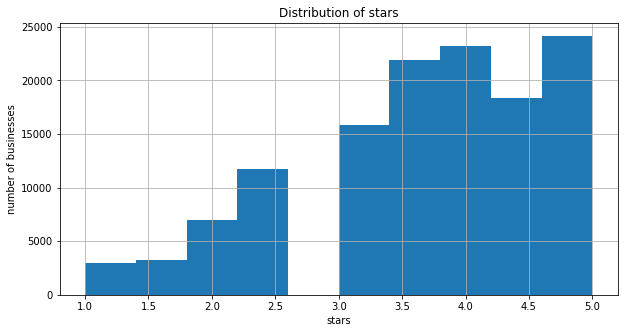

In [148]:
business_clean['stars'].hist()
xlabel('stars')
ylabel('number of businesses')
title('Distribution of stars')
#skewed towards end3

In [149]:
business_clean['stars'].median()

4.0

In [150]:
business_clean['review_count'].median()
#highly skewed

9.0

Text(0.5,1,'Distribution of review_count')

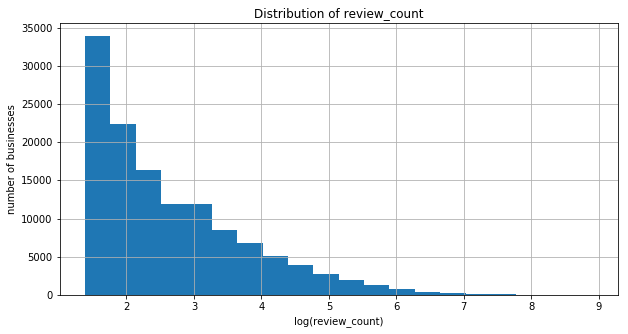

In [151]:
#What if we take log?
business_clean['review_count'].apply(np.log1p).hist(bins=20)
xlabel('log(review_count)')
ylabel('number of businesses')
title('Distribution of review_count')
#This gives us a much better understanding

In [152]:
business_clean.loc[(business_clean['review_count']>=8) & (business_clean['stars']>=3.5),'category']="Going great"
business_clean.loc[(business_clean['review_count']>=8) & (business_clean['stars']<3.5),'category']="Need to improve"
business_clean.loc[(business_clean['review_count']<8) & (business_clean['stars']<3.5),'category']="God save"
business_clean.loc[(business_clean['review_count']<8) & (business_clean['stars']>=3.5),'category']="Loyal customers"
business_clean

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,category
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists,Going great
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""","""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists,Need to improve
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""","""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles,Need to improve
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""","""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods,Need to improve
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New),Going great
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""","""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services,Loyal customers
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""","""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping,Need to improve
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""","""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea,Going great
9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""","""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,1,Automotive,Loyal customers
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""","""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Breakfast & Brunch,Loyal customers


In [153]:
business_clean['category'].value_counts()

Going great        50414
Loyal customers    37198
Need to improve    21619
God save           19071
Name: category, dtype: int64

In [154]:
category_sum=business_clean.groupby(['category','is_open'])['business_id'].count().unstack()
category_sum

is_open,0,1
category,,
God save,3444,15627
Going great,6993,43421
Loyal customers,5855,31343
Need to improve,3678,17941


In [155]:
attr.isna().values.any()
#There are no null values in the business attribute dataframe.

False

In [156]:
business_attr_merged=business_clean.merge(attr,left_on="business_id",right_on="business_id")
business_attr_merged

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Corkage,DietaryRestrictions_dairyfree,DietaryRestrictions_glutenfree,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soyfree,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""","""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""","""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""","""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
5,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""","""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
6,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""","""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
7,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""","""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
8,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""","""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
9,Y0eMNa5C-YU1RQOZf9XvVA,"""CubeSmart Self Storage""","""2414 South Gilbert Road""",Chandler,AZ,85286,33.271720,-111.791257,5.0,23,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


Look deeper into these segments

In [157]:
b1=business_attr_merged[business_attr_merged['category'] == 'Going great']
b2=business_attr_merged[business_attr_merged['category'] == 'Loyal customers']
b3=business_attr_merged[business_attr_merged['category'] == 'God save']
b4=business_attr_merged[business_attr_merged['category'] == 'Need to improve']

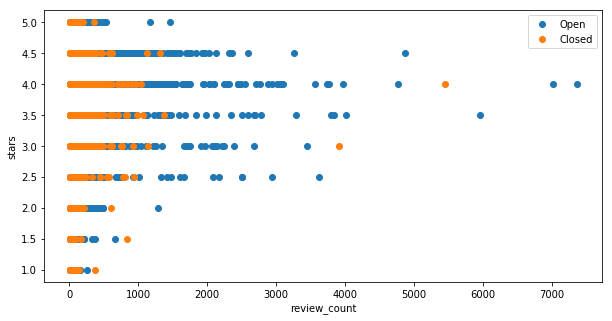

In [158]:
#To see if our grouping of category on the businesses correct?

c4 = business_attr_merged[business_attr_merged['is_open'] == 1]
c6 = business_attr_merged[business_attr_merged['is_open'] == 0]

plot(c4['review_count'], c4['stars'], marker='o', linestyle='None', label='Open')
plot(c6['review_count'], c6['stars'], marker='o', linestyle='None', label='Closed')
xlabel('review_count')
ylabel('stars')
legend(numpoints=1, loc='best')
show()

In [159]:
#So mostly the businesses are open in the going great and loyal customers segment and 
#almost all of the businesses are closed in need to improve and God save segments.

Checking effect of attributes on business being open or closed across category- that we created based on review_count and stars.

In [160]:
business_attr_merged.groupby(['category','is_open','Alcohol'])['Alcohol'].count().unstack()

Alcohol                  False     Na  True
category        is_open                    
God save        0           71   2614   107
                1          515   9867   787
Going great     0           50   6509   179
                1          457  38588  1681
Loyal customers 0           77   4653   221
                1          638  22335  1627
Need to improve 0           30   3417    72
                1          373  15538   795

In [161]:
business_attr_merged.groupby(['category','is_open','DietaryRestrictions_vegan'])['DietaryRestrictions_vegan'].count().unstack()

DietaryRestrictions_vegan  False       Na  True
category        is_open                        
God save        0            NaN   2792.0   NaN
                1            NaN  11169.0   NaN
Going great     0            8.0   6729.0   1.0
                1           30.0  40686.0  10.0
Loyal customers 0            NaN   4950.0   1.0
                1            NaN  24599.0   1.0
Need to improve 0            2.0   3516.0   1.0
                1            2.0  16702.0   2.0

In [162]:
business_attr_merged.groupby(['category','is_open','BusinessAcceptsCreditCards'])['BusinessAcceptsCreditCards'].count().unstack()

BusinessAcceptsCreditCards  False     Na  True
category        is_open                       
God save        0             177   2466   149
                1            1341   8680  1148
Going great     0             274   6261   203
                1            3442  34201  3083
Loyal customers 0             364   4159   428
                1            2837  18201  3562
Need to improve 0             139   3279   101
                1            1725  14143   838

In [163]:
business_attr_merged.groupby(['category','is_open','BusinessParking_valet'])['BusinessParking_valet'].count().unstack()

BusinessParking_valet    False     Na  True
category        is_open                    
God save        0          670   1961   161
                1         1184   9852   133
Going great     0         1234   3557  1947
                1         4273  30587  5866
Loyal customers 0          917   3727   307
                1         1343  23004   253
Need to improve 0          682   1845   992
                1         2760  11885  2061

In [164]:
business_attr_merged.groupby(['category','is_open','WheelchairAccessible'])['WheelchairAccessible'].count().unstack()

WheelchairAccessible     False     Na  True
category        is_open                    
God save        0          120   2369   303
                1          171  10328   670
Going great     0          182   5477  1079
                1          405  36547  3774
Loyal customers 0          135   4255   561
                1          248  23085  1267
Need to improve 0          103   2843   573
                1          246  14730  1730

In [165]:
business_attr_merged.groupby(['category','is_open','BikeParking'])['BikeParking'].count().unstack()

BikeParking              False     Na   True
category        is_open                     
God save        0           55   2096    641
                1          124  10121    924
Going great     0          170   3658   2910
                1         1002  26742  12982
Loyal customers 0          110   3588   1253
                1          438  20704   3458
Need to improve 0           83   2142   1294
                1          284  13270   3152

Let us interpret the Na in the set as follows : True means the business has this feature and is operational;
                                              : Na means they had it once but not operational now
                                              : False means they never had this feature

In [166]:
business_categories=business_attr_merged.groupby(['categories','is_open','category'])['business_id'].count().unstack(-1).fillna(0)
business_categories[:5]

category                   God save  Going great  Loyal customers  \
categories        is_open                                           
3D Printing       1             0.0          1.0              1.0   
ATV Rentals/Tours 1             0.0          2.0              3.0   
Acai Bowls        0             0.0          0.0              1.0   
                  1             1.0          5.0              1.0   
Accessories       0             8.0         12.0             33.0   

category                   Need to improve  
categories        is_open                   
3D Printing       1                    0.0  
ATV Rentals/Tours 1                    0.0  
Acai Bowls        0                    0.0  
                  1                    0.0  
Accessories       0                    2.0

In [167]:
business_categories['Total']=business_categories['God save']+business_categories['Going great']+business_categories['Need to improve']+business_categories['Loyal customers']

In [168]:
business_categories.sort_values(by='Total',ascending=False)[:20]

category                           God save  Going great  Loyal customers  \
categories                is_open                                           
Restaurants               1          1206.0       5723.0           1322.0   
                          0           626.0       1901.0            943.0   
Shopping                  1           734.0       1394.0           1375.0   
Home Services             1           616.0       1120.0           1228.0   
Beauty & Spas             1           343.0       1587.0           1038.0   
Health & Medical          1           476.0        907.0           1155.0   
Automotive                1           322.0        930.0            647.0   
Local Services            1           315.0        720.0            755.0   
Active Life               1            87.0        628.0            519.0   
Event Planning & Services 1           118.0        606.0            357.0   
Fast Food                 1           237.0        240.0             90.0   
Nightlife                 1            90.0        653.0            160.0   
Hair Salons               1           115.0        520.0            443.0   
Doctors                   1           214.0        261.0            317.0   
Real Estate               1           249.0        165.0            307.0   
Nail Salons               1           110.0        477.0            163.0   
Auto Repair               1            72.0        431.0            308.0   
Bars                      1            53.0        576.0            110.0   
Sandwiches                1           148.0        432.0            109.0   
Mexican                   1            46.0        498.0             52.0   

category                           Need to improve    Total  
categories                is_open                            
Restaurants               1                 2955.0  11206.0  
                          0                 1002.0   4472.0  
Shopping                  1                  641.0   4144.0  
Home Services             1                  544.0   3508.0  
Beauty & Spas             1                  416.0   3384.0  
Health & Medical          1                  406.0   2944.0  
Automotive                1                  368.0   2267.0  
Local Services            1                  244.0   2034.0  
Active Life               1                  115.0   1349.0  
Event Planning & Services 1                  243.0   1324.0  
Fast Food                 1                  637.0   1204.0  
Nightlife                 1                  258.0   1161.0  
Hair Salons               1                   60.0   1138.0  
Doctors                   1                  237.0   1029.0  
Real Estate               1                  255.0    976.0  
Nail Salons               1                  223.0    973.0  
Auto Repair               1                  157.0    968.0  
Bars                      1                  215.0    954.0  
Sandwiches                1                  227.0    916.0  
Mexican                   1                  278.0    874.0

In [169]:
#These are the top categories in terms of business count. So intuitively, let us see what features make sense.
attr.columns

Index([u'business_id', u'AcceptsInsurance', u'ByAppointmentOnly',
       u'BusinessAcceptsCreditCards', u'BusinessParking_garage',
       u'BusinessParking_street', u'BusinessParking_validated',
       u'BusinessParking_lot', u'BusinessParking_valet',
       u'HairSpecializesIn_coloring', u'HairSpecializesIn_africanamerican',
       u'HairSpecializesIn_curly', u'HairSpecializesIn_perms',
       u'HairSpecializesIn_kids', u'HairSpecializesIn_extensions',
       u'HairSpecializesIn_asian', u'HairSpecializesIn_straightperms',
       u'RestaurantsPriceRange2', u'GoodForKids', u'WheelchairAccessible',
       u'BikeParking', u'Alcohol', u'HasTV', u'NoiseLevel',
       u'RestaurantsAttire', u'Music_dj', u'Music_background_music',
       u'Music_no_music', u'Music_karaoke', u'Music_live', u'Music_video',
       u'Music_jukebox', u'Ambience_romantic', u'Ambience_intimate',
       u'Ambience_classy', u'Ambience_hipster', u'Ambience_divey',
       u'Ambience_touristy', u'Ambience_trendy', u'Ambie

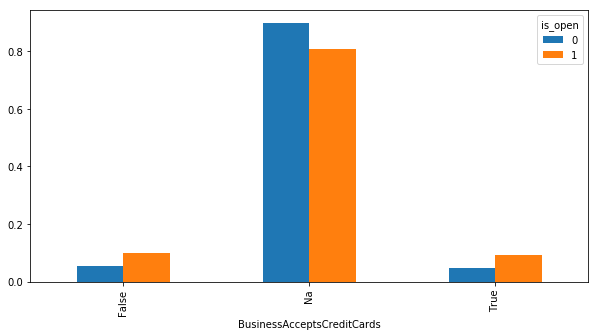

In [170]:
credit_vs_open = pd.crosstab(business_attr_merged['BusinessAcceptsCreditCards'], business_attr_merged['is_open'])
total_credit = credit_vs_open.apply(sum)
credit_vs_open = credit_vs_open/total_credit
credit_vs_open.plot(kind='bar')

#Maybe if business bring this back, it could help them, but not to a great extent
#So, not very correlated to target - open

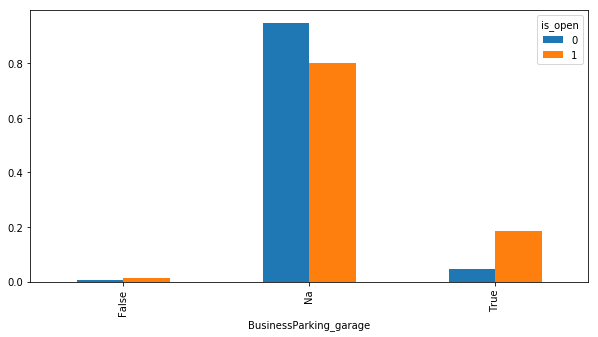

In [171]:
garage_vs_open = pd.crosstab(business_attr_merged['BusinessParking_garage'], business_attr_merged['is_open'])
total_garage = garage_vs_open.apply(sum)
garage_vs_open = garage_vs_open/total_garage
garage_vs_open.plot(kind='bar')

#Bringing this back, will help the business stay open longer.
#Positive correlation

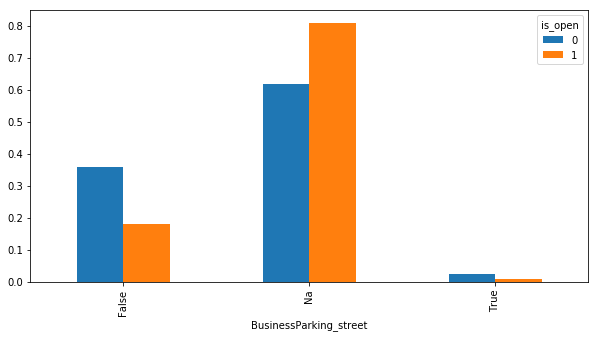

In [172]:
street_vs_open = pd.crosstab(business_attr_merged['BusinessParking_street'], business_attr_merged['is_open'])
total_street = street_vs_open.apply(sum)
street_vs_open = street_vs_open/total_street
street_vs_open.plot(kind='bar')

#Having parking street will help in not closing down.
#May be the na is high for open business, because they had it once and they earned repeat customers.
#Positive correlation

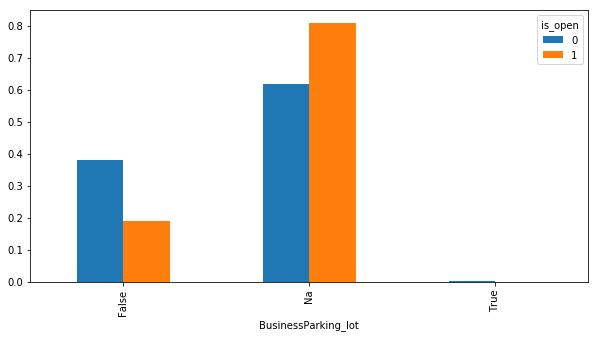

In [173]:
parkinglot_vs_open = pd.crosstab(business_attr_merged['BusinessParking_lot'], business_attr_merged['is_open'])
total_lot = parkinglot_vs_open.apply(sum)
parkinglot_vs_open = parkinglot_vs_open/total_lot
parkinglot_vs_open.plot(kind='bar')

#Same as Parking street

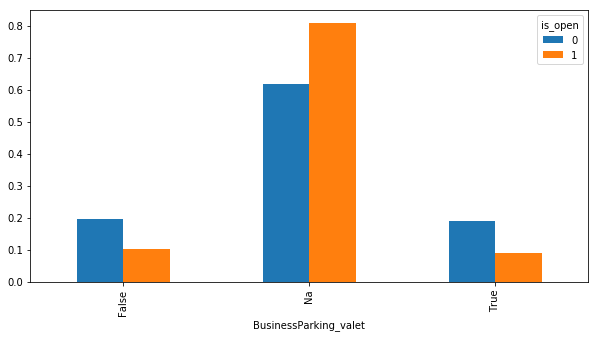

In [174]:
valet_vs_open = pd.crosstab(business_attr_merged['BusinessParking_valet'], business_attr_merged['is_open'])
total_valet = valet_vs_open.apply(sum)
valet_vs_open = valet_vs_open/total_valet
valet_vs_open.plot(kind='bar')

#Not correlated - not required

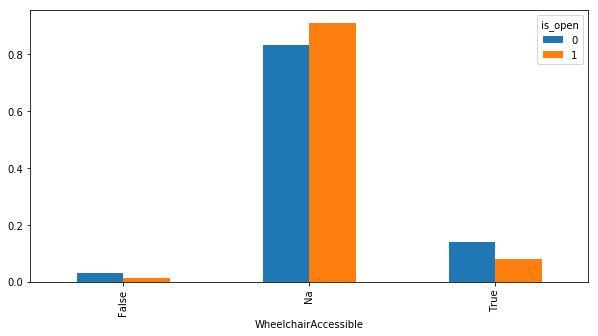

In [175]:
wheelchair_vs_open = pd.crosstab(business_attr_merged['WheelchairAccessible'], business_attr_merged['is_open'])
total_wheelchair = wheelchair_vs_open.apply(sum)
wheelchair_vs_open = wheelchair_vs_open/total_wheelchair
wheelchair_vs_open.plot(kind='bar')

#Not correlated - not required

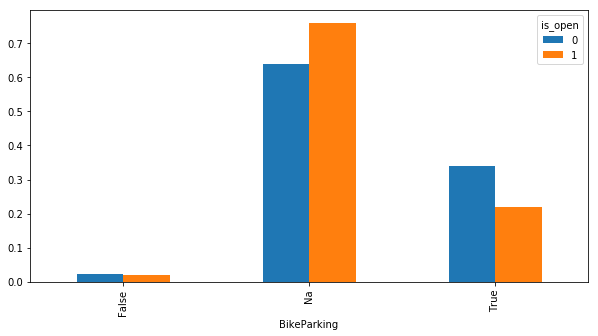

In [176]:
bikepark_vs_open = pd.crosstab(business_attr_merged['BikeParking'], business_attr_merged['is_open'])
total_bikes = bikepark_vs_open.apply(sum)
bikepark_vs_open = bikepark_vs_open/total_bikes
bikepark_vs_open.plot(kind='bar')

#Not correlated - not required

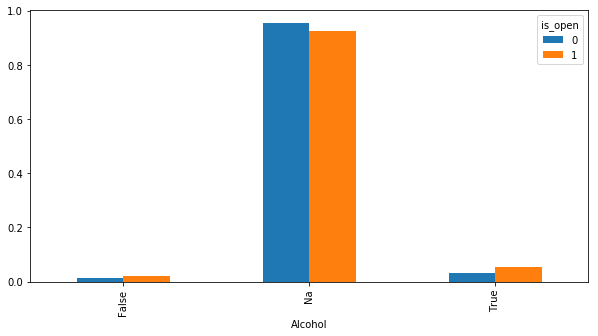

In [177]:
alcohol_vs_open = pd.crosstab(business_attr_merged['Alcohol'], business_attr_merged['is_open'])
total_alcohol = alcohol_vs_open.apply(sum)
alcohol_vs_open = alcohol_vs_open/total_alcohol
alcohol_vs_open.plot(kind='bar')

#More open with it. POsitive correlation

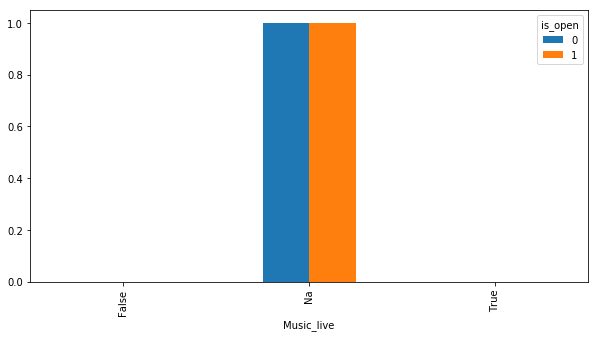

In [178]:
music_vs_open = pd.crosstab(business_attr_merged['Music_live'], business_attr_merged['is_open'])
total_music = music_vs_open.apply(sum)
music_vs_open = music_vs_open/total_music
music_vs_open.plot(kind='bar')

#No effect

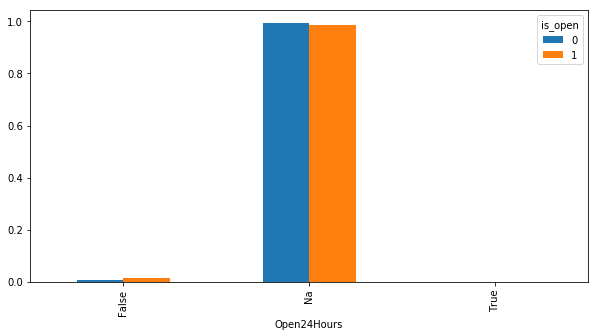

In [179]:
open24_vs_open = pd.crosstab(business_attr_merged['Open24Hours'], business_attr_merged['is_open'])
total_open24 = open24_vs_open.apply(sum)
open24_vs_open = open24_vs_open/total_open24
open24_vs_open.plot(kind='bar')

#No effect

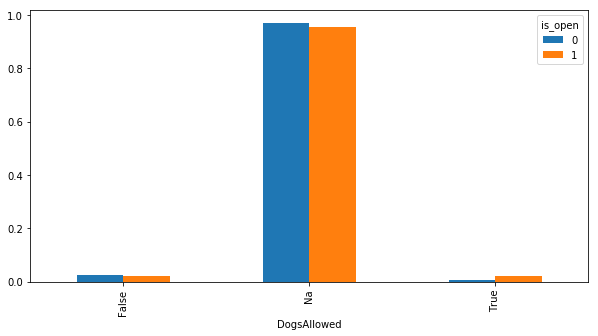

In [180]:
dogs_vs_open = pd.crosstab(business_attr_merged['DogsAllowed'], business_attr_merged['is_open'])
total_dogs = dogs_vs_open.apply(sum)
dogs_vs_open = dogs_vs_open/total_dogs
dogs_vs_open.plot(kind='bar')

#No effect

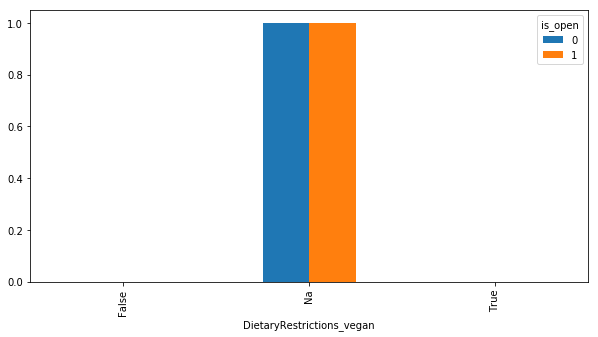

In [181]:
vegan_vs_open = pd.crosstab(business_attr_merged['DietaryRestrictions_vegan'], business_attr_merged['is_open'])
total_vegan = vegan_vs_open.apply(sum)
vegan_vs_open = vegan_vs_open/total_vegan
vegan_vs_open.plot(kind='bar')

#No effect

# Predicting using logistic

Let us try to predict the attributes that lead to closure of businesses or successful operations of them

In [182]:
new_attr=business_attr_merged[['category','categories','is_open','AcceptsInsurance', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican',
       'HairSpecializesIn_curly', 'HairSpecializesIn_perms',
       'HairSpecializesIn_kids', 'HairSpecializesIn_extensions',
       'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel',
       'RestaurantsAttire', 'Music_dj', 'Music_background_music',
       'Music_no_music', 'Music_karaoke', 'Music_live', 'Music_video',
       'Music_jukebox', 'Ambience_romantic', 'Ambience_intimate',
       'Ambience_classy', 'Ambience_hipster', 'Ambience_divey',
       'Ambience_touristy', 'Ambience_trendy', 'Ambience_upscale',
       'Ambience_casual', 'RestaurantsGoodForGroups', 'Caters', 'WiFi',
       'RestaurantsReservations', 'RestaurantsTakeOut', 'HappyHour',
       'GoodForDancing', 'RestaurantsTableService', 'OutdoorSeating',
       'RestaurantsDelivery', 'BestNights_monday', 'BestNights_tuesday',
       'BestNights_friday', 'BestNights_wednesday', 'BestNights_thursday',
       'BestNights_sunday', 'BestNights_saturday', 'GoodForMeal_dessert',
       'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
       'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'CoatCheck',
       'Smoking', 'DriveThru', 'DogsAllowed', 'BusinessAcceptsBitcoin',
       'Open24Hours', 'BYOBCorkage', 'BYOB', 'Corkage',
       'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService']]
new_attr.shape

(111201, 81)

In [183]:
only_res=new_attr[new_attr['categories']=='Restaurants']
only_res.set_index(['category','categories'], inplace=True)
only_res.shape

(15678, 79)

Creating Target

In [184]:
only_res['target'] = 0.0
only_res['target'][only_res['is_open'] > 0] = 1.0  #positive class
only_res['target'].value_counts()

C:\Users\legle\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\legle\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1.0    11206
0.0     4472
Name: target, dtype: int64

In [185]:
column_names=only_res.columns.values
column_names

array(['is_open', 'AcceptsInsurance', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican',
       'HairSpecializesIn_curly', 'HairSpecializesIn_perms',
       'HairSpecializesIn_kids', 'HairSpecializesIn_extensions',
       'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel',
       'RestaurantsAttire', 'Music_dj', 'Music_background_music',
       'Music_no_music', 'Music_karaoke', 'Music_live', 'Music_video',
       'Music_jukebox', 'Ambience_romantic', 'Ambience_intimate',
       'Ambience_classy', 'Ambience_hipster', 'Ambience_divey',
       'Ambience_touristy', 'Ambience_trendy', 'Ambience_upscale',
       'Ambience_casual', 'Res

In [186]:
formula = 'target ~ 0 + {}'.format(' + '.join(['C(Q("{}"))'.format(column_names[i]) for i in range(1,79)]))
formula

'target ~ 0 + C(Q("AcceptsInsurance")) + C(Q("ByAppointmentOnly")) + C(Q("BusinessAcceptsCreditCards")) + C(Q("BusinessParking_garage")) + C(Q("BusinessParking_street")) + C(Q("BusinessParking_validated")) + C(Q("BusinessParking_lot")) + C(Q("BusinessParking_valet")) + C(Q("HairSpecializesIn_coloring")) + C(Q("HairSpecializesIn_africanamerican")) + C(Q("HairSpecializesIn_curly")) + C(Q("HairSpecializesIn_perms")) + C(Q("HairSpecializesIn_kids")) + C(Q("HairSpecializesIn_extensions")) + C(Q("HairSpecializesIn_asian")) + C(Q("HairSpecializesIn_straightperms")) + C(Q("RestaurantsPriceRange2")) + C(Q("GoodForKids")) + C(Q("WheelchairAccessible")) + C(Q("BikeParking")) + C(Q("Alcohol")) + C(Q("HasTV")) + C(Q("NoiseLevel")) + C(Q("RestaurantsAttire")) + C(Q("Music_dj")) + C(Q("Music_background_music")) + C(Q("Music_no_music")) + C(Q("Music_karaoke")) + C(Q("Music_live")) + C(Q("Music_video")) + C(Q("Music_jukebox")) + C(Q("Ambience_romantic")) + C(Q("Ambience_intimate")) + C(Q("Ambience_clas

In [197]:
from patsy import dmatrices
Y, X = dmatrices(formula, only_res, return_type='dataframe')
y = Y['target'].values
X.shape

(15678, 110)

Split the data into training and testing sets

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Fit the classifier

In [189]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [190]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.7277200656096228


Accuracy on test set

In [191]:
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.7096088435374149


Baseline = predict the most frequent class

In [192]:
# y_train is 0 or 1.
print 'Number of positive examples =', len(y_train[y_train==1])
print 'Number of negative examples =', len(y_train[y_train==0])

Number of positive examples = 7895
Number of negative examples = 3079


In [193]:
#Hence, baseline will be always predicting the positive class.

positive_examples_in_test = len(y_test[y_test==1])
total_examples_in_test = len(y_test)

print 'Number of examples where baseline is correct =', positive_examples_in_test
print 'Baseline accuracy =', positive_examples_in_test * 1.0 / total_examples_in_test

Number of examples where baseline is correct = 3311
Baseline accuracy = 0.703869047619


Feature weights

In [194]:
model.coef_

array([[ 2.64601600e-01, -1.38338154e+00,  3.57501087e-01,
         8.16068751e-04,  2.52208314e-01,  3.55937290e-02,
        -1.79397506e-01,  3.55937290e-02,  5.09210686e-02,
         3.55937290e-02,  2.77408780e-01,  3.55937290e-02,
        -2.38332479e-02,  3.55937290e-02,  1.84606866e-01,
         4.85759934e-01, -1.00618890e-01,  6.97969301e-01,
         1.07396875e+00,  1.60129263e-01,  1.93682201e-01,
        -8.77463643e-02, -4.96953231e-01,  3.88716136e-02,
        -3.64453621e-01, -9.33435537e-01, -1.62016158e+00,
        -9.30044231e-01,  7.29908259e-01, -4.52293225e-02,
         5.41143638e-01, -3.21381365e-01,  5.04156279e-01,
         2.07718919e-01, -6.96609436e-01,  1.35151844e-01,
         1.35151844e-01,  1.35151844e-01,  1.35151844e-01,
         1.35151844e-01,  1.35151844e-01,  1.35151844e-01,
         1.35151844e-01,  1.35151844e-01,  1.19598600e-01,
        -3.82018639e-01,  5.30575779e-02,  3.72788770e-01,
        -8.59122406e-01, -1.10250245e+00,  0.00000000e+0

In [195]:
# And the model intercept
model.intercept_

array([0.2646016])

In [198]:
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()

C(Q("BYOB"))[T.no]                           -1.892154
C(Q("RestaurantsDelivery"))[T.True]          -1.859379
C(Q("BYOB"))[T.yes_free]                     -1.645230
C(Q("HasTV"))[T.full_bar]                    -1.620162
C(Q("HappyHour"))[T.Na]                      -1.571634
C(Q("BusinessAcceptsCreditCards"))[T.Na]     -1.383382
C(Q("RestaurantsReservations"))[T.no]        -1.102502
C(Q("BYOB"))[T.yes_corkage]                  -1.025325
C(Q("HasTV"))[T.beer_and_wine]               -0.933436
C(Q("HasTV"))[T.none]                        -0.930044
C(Q("RestaurantsReservations"))[T.free]      -0.859122
C(Q("OutdoorSeating"))[T.True]               -0.746982
C(Q("DogsAllowed"))[T.Na]                    -0.700242
C(Q("Music_dj"))[T.casual]                   -0.696609
C(Q("BikeParking"))[T.True]                  -0.496953
C(Q("Smoking"))[T.Na]                        -0.449647
C(Q("AgesAllowed"))[T.True]                  -0.441059
C(Q("Caters"))[T.True]                       -0.382019
C(Q("GoodF

Trying it on shopping to compare the kind of difference in attributes importance for both the categories

In [220]:
only_shop=new_attr[new_attr['categories']=='Shopping']
only_shop.set_index(['category','categories'], inplace=True)
only_shop.shape

(4978, 79)

In [221]:
#it is exactly the same columns as in only_res. So we are using those column names

In [222]:
only_shop['target'] = 0.0
only_shop['target'][only_shop['is_open'] > 0] = 1.0  #positive class
only_shop['target'].value_counts()

C:\Users\legle\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\legle\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1.0    4144
0.0     834
Name: target, dtype: int64

In [223]:
formula_shop = 'target ~ 0 + {}'.format(' + '.join(['C(Q("{}"))'.format(column_names[i]) for i in range(1,79)]))
formula_shop

'target ~ 0 + C(Q("AcceptsInsurance")) + C(Q("ByAppointmentOnly")) + C(Q("BusinessAcceptsCreditCards")) + C(Q("BusinessParking_garage")) + C(Q("BusinessParking_street")) + C(Q("BusinessParking_validated")) + C(Q("BusinessParking_lot")) + C(Q("BusinessParking_valet")) + C(Q("HairSpecializesIn_coloring")) + C(Q("HairSpecializesIn_africanamerican")) + C(Q("HairSpecializesIn_curly")) + C(Q("HairSpecializesIn_perms")) + C(Q("HairSpecializesIn_kids")) + C(Q("HairSpecializesIn_extensions")) + C(Q("HairSpecializesIn_asian")) + C(Q("HairSpecializesIn_straightperms")) + C(Q("RestaurantsPriceRange2")) + C(Q("GoodForKids")) + C(Q("WheelchairAccessible")) + C(Q("BikeParking")) + C(Q("Alcohol")) + C(Q("HasTV")) + C(Q("NoiseLevel")) + C(Q("RestaurantsAttire")) + C(Q("Music_dj")) + C(Q("Music_background_music")) + C(Q("Music_no_music")) + C(Q("Music_karaoke")) + C(Q("Music_live")) + C(Q("Music_video")) + C(Q("Music_jukebox")) + C(Q("Ambience_romantic")) + C(Q("Ambience_intimate")) + C(Q("Ambience_clas

In [224]:
from patsy import dmatrices
Y, X = dmatrices(formula_shop, only_shop, return_type='dataframe')
y = Y['target'].values

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [226]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [227]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.8340987370838117


In [228]:
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.8293172690763052


In [229]:
# y_train is 0 or 1.
print 'Number of positive examples =', len(y_train[y_train==1])
print 'Number of negative examples =', len(y_train[y_train==0])

Number of positive examples = 2902
Number of negative examples = 582


In [230]:
#Hence, baseline will be always predicting the positive class.

positive_examples_in_test = len(y_test[y_test==1])
total_examples_in_test = len(y_test)

print 'Number of examples where baseline is correct =', positive_examples_in_test
print 'Baseline accuracy =', positive_examples_in_test * 1.0 / total_examples_in_test

Number of examples where baseline is correct = 1242
Baseline accuracy = 0.831325301205


In [231]:
model.coef_

array([[ 0.09166639,  0.09166639,  0.17726714,  0.7111594 , -0.49915232,
        -0.10804974,  0.20083497, -0.26896489,  0.20083497, -0.2761876 ,
         0.20083497, -0.50728553,  0.20083497, -0.68783884,  0.20083497,
        -0.55648859,  0.36867682,  0.26168297, -0.14996803,  0.43437035,
         0.11577402, -1.02559538,  0.51327982,  0.09218464, -0.03344432,
        -0.02865214,  0.        , -0.59584283,  0.10928041,  0.09166639,
         0.10928041,  0.        , -0.02532183, -1.15605294,  0.09424679,
         0.34022055,  0.09166639, -0.20911204,  0.20203414,  0.09166639,
         0.09166639,  0.09166639,  0.09166639,  0.        ,  0.09166639,
        -0.02532183, -0.1989336 , -0.70134379,  0.52575594,  0.09166639]])

In [232]:
# And the model intercept
model.intercept_

array([0.09166639])

In [233]:
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending=False)
#weights.abs().sort_values

C(Q("BusinessAcceptsCreditCards"))[T.True]    0.711159
C(Q("Open24Hours"))[T.Na]                     0.525756
C(Q("BikeParking"))[T.Na]                     0.513280
C(Q("GoodForKids"))[T.Na]                     0.434370
C(Q("GoodForKids"))[T.2]                      0.368677
C(Q("RestaurantsTableService"))[T.Na]         0.340221
C(Q("GoodForKids"))[T.3]                      0.261683
C(Q("BestNights_monday"))[T.True]             0.202034
C(Q("BusinessParking_street"))[T.Na]          0.200835
C(Q("BusinessParking_validated"))[T.Na]       0.200835
C(Q("BusinessParking_lot"))[T.Na]             0.200835
C(Q("BusinessParking_valet"))[T.Na]           0.200835
C(Q("HairSpecializesIn_coloring"))[T.Na]      0.200835
C(Q("BusinessAcceptsCreditCards"))[T.Na]      0.177267
C(Q("WheelchairAccessible"))[T.Na]            0.115774
C(Q("HasTV"))[T.none]                         0.109280
C(Q("RestaurantsReservations"))[T.free]       0.109280
C(Q("HappyHour"))[T.True]                     0.094247
C(Q("BikeP

In [234]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

#import sklearn.metrics as metrics
#(metrics.recall_score(y_test, prediction),metrics.precision_score(y_test,prediction))
len(y_test[y_test==1])

1242

In [235]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [236]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
result = model.fit(X_train, y_train)
from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.8335246842709529
0.8259705488621151
